In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [6]:
df = pd.read_excel('MOE_target_columns.xlsx')
scaled_df = pd.read_excel('scaled_MOE_target_columns.xlsx')
df.head()

,model,name,mseq,Query,Template,comment,Template ID,error,pH,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,res_hyd,res_pos,res_neg,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,res_exp,res_ASA,res_charge,propKa,pI_seq,Accelerated Stability,Name,modified_pI_seq,modified_ens_charge
0,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,abituzumab_VL abituzumab_VH,1,NaN,S(SCC(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(...,VL_FR:5VSI.L VL_CDR1:4O02.L VL_CDR2:4UIL.L ...,98.130844 91.525421,NaN,7.4,530,140,0.000000,0.237288,370,100,0,100,0 0 0 0 0 0 0 0 0 0 0 0 0 0 24.563305 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.500000,24.816916,7.869629,17.579374,23.005478,10208.171,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,83.163406 4.8058691 64.616409 0.34274378 41.89...,146.90816 10.681092 129.13332 0.83838898 73.06...,-0.076899253 -0.046170697 0.0085293036 -0.0090...,5.2649999 NaN NaN NaN NaN NaN NaN NaN NaN NaN ...,0.462793,0.196851,abituzumab,6.837207,0.500000
1,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,abrilumab_VL abrilumab_VH,2,NaN,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,VL_FR:5I5K.L VL_CDR1:4XI5.C VL_CDR2:4D3C.L ...,98.130844 81.355934,NaN,7.4,370,120,0.500000,0.525424,180,40,190,230,0 0 0 0 0 0 0 0 0 0 0 0 0 0 40.994633 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.142857,24.327295,4.259277,17.767235,23.201422,10425.539,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,66.070038 5.6332622 37.820686 0.81320441 43.26...,116.71272 12.519981 75.583122 1.9891875 75.456...,-0.077311166 -0.046409942 0.0082900552 -0.0093...,4.8231468 NaN NaN NaN NaN NaN NaN NaN NaN NaN ...,0.093116,0.108084,abrilumab,7.206884,0.142857
2,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,adalimumab_VL adalimumab_VH,3,NaN,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,VL_FR:6CR1.L VL_CDR1:6CR1.L VL_CDR2:6CR1.L ...,100 100,NaN,7.4,480,190,0.105263,0.389831,230,100,40,140,0 0 0 0 0 0 0 0 0 0 0 0 0 0 27.445711 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.500000,24.932201,7.942871,17.481434,23.139603,10168.905,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,63.815479 21.676079 54.663174 2.8904467 30.411...,112.73005 48.175304 109.24216 7.0703506 53.045...,-0.078718483 -0.047286216 0.0074137808 -0.0101...,5.4089413 NaN NaN NaN NaN NaN NaN NaN NaN NaN ...,0.516514,0.180812,adalimumab,6.783486,0.500000
3,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,alemtuzumab_VL alemtuzumab_VH,4,NaN,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,VL_FR:1CE1.L VL_CDR1:1CE1.L VL_CDR2:1CE1.L ...,100 100,NaN,7.4,250,180,0.000000,0.305085,0,140,0,140,0 0 0 0 0 0 0 0 0 0 0 0 0 0 23.231073 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 35.693169 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0.785714,25.238771,9.275879,17.646730,23.115566,10227.042,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,73.120232 1.0530219 58.356998 0.18209895 35.76...,129.16689 2.3403516 116.62413 0.44543409 62.38...,-0.078772575 -0.047304809 0.0073951897 -0.0102...,5.4400001 NaN NaN NaN NaN NaN NaN NaN NaN NaN ...,0.823916,0.225032,alemtuzumab,6.476084,0.785714
4,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,alirocumab_VL alirocumab_VH,5,NaN,S(CCC(NC(=O)C(NC(=O)C(NC(=O)C([N+])CC(=O)[O-])...,VL_FR:6AZM.A VL_CDR1:7MZK.M VL_CDR2:6ZEC.L ...,95.575218 88.13559,NaN,7.4,540,0,0.236842,0.152542,250,0,50,50,0 0 0 0 0 0 0 0 0 0 0 0 0 0 38.645931 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 36.24337 7.198...,0.428571,25.327526,7.430176,17.739100,23.234877,10287.536,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,64.193634 0 57.640144 1.8085078 37.165215 0 42...,113.39806 0 112.62769 4.4

In [7]:
data_types = df.dtypes
print(data_types)

model                     object
name                      object
mseq                       int64
Query                    float64
Template                  object
comment                   object
Template ID               object
error                    float64
pH                       float64
patch_hyd                  int64
patch_pos                  int64
patch_neg                float64
patch_ion                float64
patch_cdr_hyd              int64
patch_cdr_pos              int64
patch_cdr_neg              int64
patch_cdr_ion              int64
res_hyd                   object
res_pos                   object
res_neg                   object
ens_charge               float64
mass                     float64
pI_3D                    float64
r_gyr                    float64
r_solv                   float64
asa_vdw                  float64
asa_hyd                  float64
asa_hph                  float64
volume                   float64
mobility                 float64
dipole_mom

In [8]:
columns_drop = ['Query', 'error', 'pH']
new_df = df.select_dtypes(include=['int', 'float'])
new_df.drop(columns=['Query', 'error', 'pH'], inplace=True)
new_df

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq,modified_ens_charge
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.1710,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207,0.500000
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.5390,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884,0.142857
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.9050,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486,0.500000
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.0420,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084,0.785714
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.5360,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,133,430,80,0.184211,0.271186,230,40,150,190,0.500000,25.653990,7.327637,17.717699,23.659315,10547.1310,5915.9258,4165.5684,0.458276,-0.424047,317.80878,0.566590,0.516514,0.145779,6.783486,0.500000
132,134,420,90,0.473684,0.694915,320,50,70,120,0.714286,24.822853,8.045410,17.708420,22.982862,10222.8310,5787.6265,4038.5723,0.436453,3.162036,337.44629,0.508209,0.710505,0.203247,6.589495,0.714286
133,135,470,230,0.263158,0.322034,220,100,180,280,0.500000,24.742920,8.821777,17.639877,22.961054,10174.7400,5781.9902,3982.5945,0.753815,6.360532,499.75851,0.223124,0.435933,0.178019,6.864067,0.500000
134,136,570,90,0.000000,0.135593,330,40,100,140,0.571429,25.467899,7.488770,17.726509,23.342237,10389.3130,6108.8066,3889.8706,0.284922,0.141405,383.33072,0.093087,0.570235,0.099643,6.729765,0.571429


Text(0.5, 1.0, 'Correlation Heatmap of Antibody Descriptors')

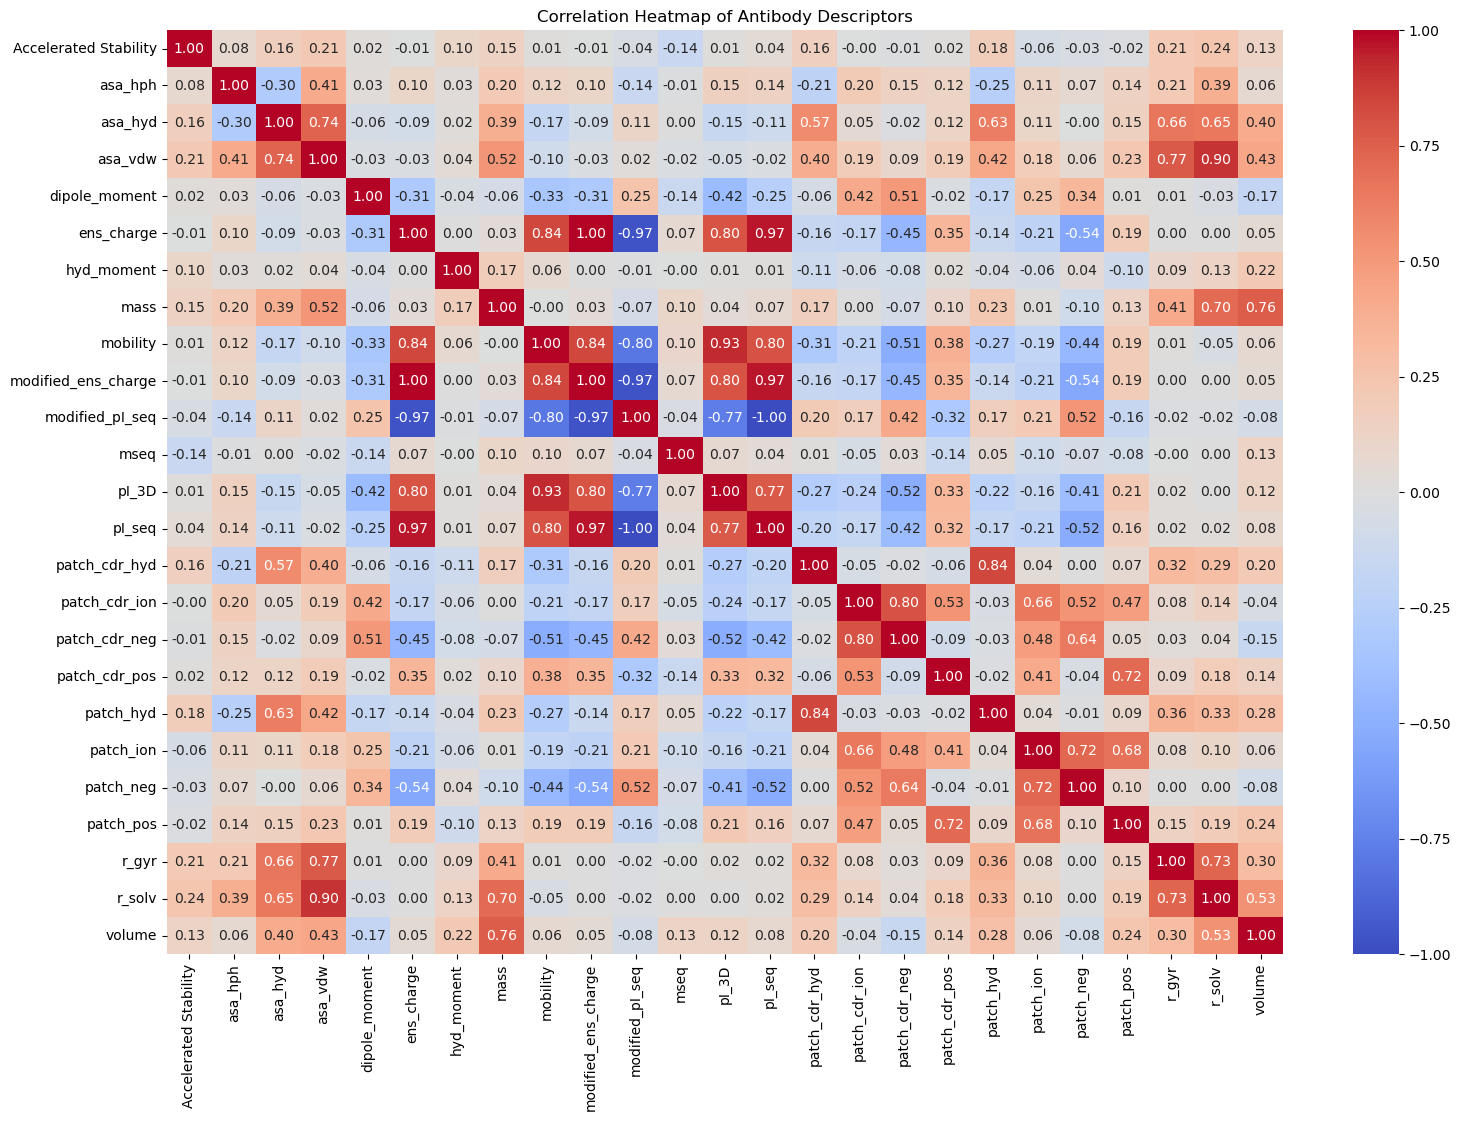

In [ ]:
#heatmap of all integer variables
columns_drop = ['Query', 'error', 'pH']
heatmap_df = df.select_dtypes(include=['int', 'float']).columns.difference(columns_drop)
plt.figure(figsize=(18,12))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Antibody Descriptors')

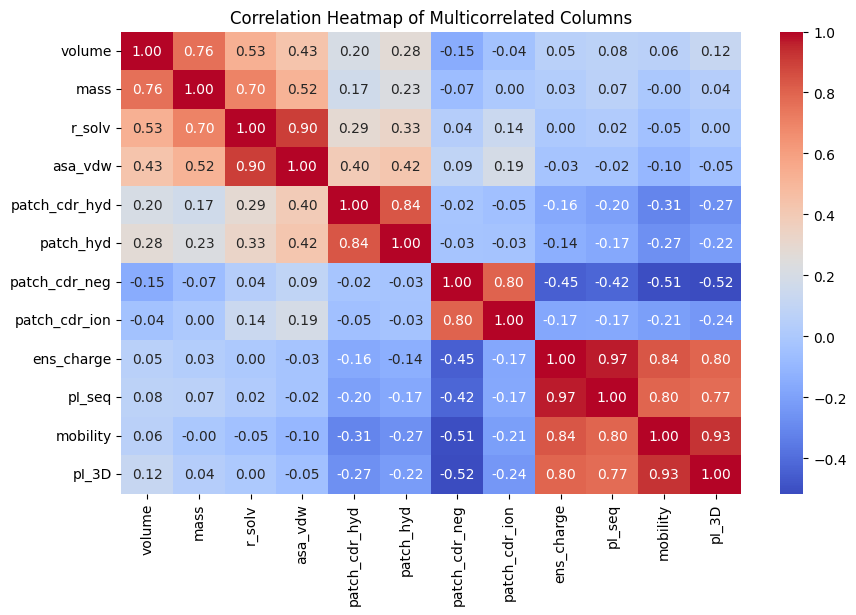

In [9]:
#colinear variables (half of these should be removed)
multico_var = ['volume', 'mass', 'r_solv', 'asa_vdw', 'patch_cdr_hyd', 'patch_hyd', 'patch_cdr_neg', 'patch_cdr_ion', 'ens_charge', 'pI_seq', 'mobility', 'pI_3D']
plt.figure(figsize=(10,6))
sns.heatmap(df[multico_var].corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Multicorrelated Columns')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Colinear Descriptors')

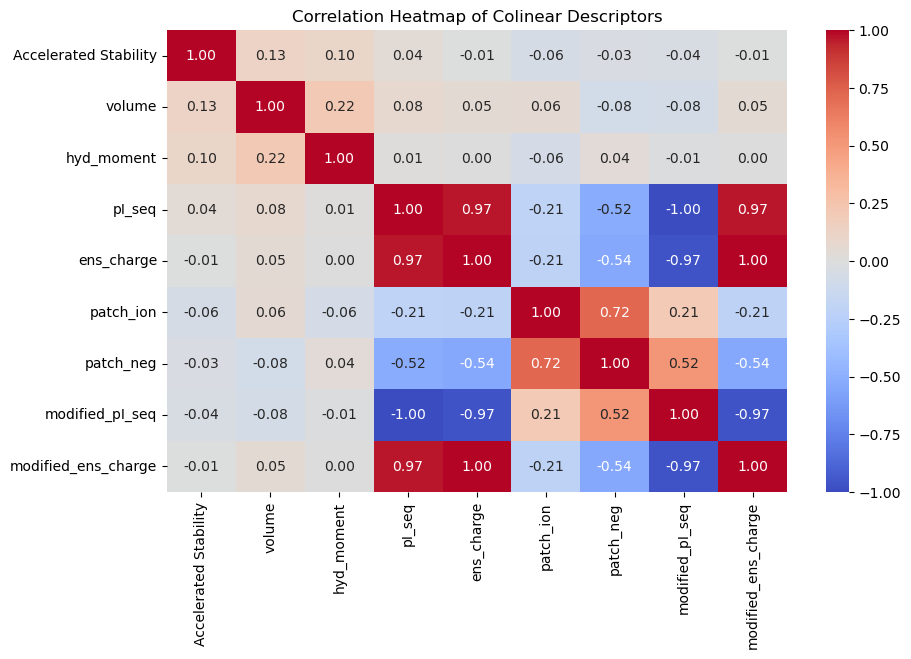

In [ ]:
heatmap_df = scaled_df.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Colinear Descriptors')

In [10]:
df.drop(columns=['ens_charge'], inplace=True)

In [ ]:
# from pycaret.datasets import get_data
# from pycaret.regression import setup, compare_models

# setup(df, target='Accelerated Stability', remove_multicollinearity='vif', multicollinearity_threshold=10)

# best_model = compare_models()

In [11]:
new_df.head()

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq,modified_ens_charge
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.171,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207,0.500000
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.539,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884,0.142857
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.905,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486,0.500000
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.042,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084,0.785714
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.536,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067,0.428571


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

X = new_df.drop(columns=['Accelerated Stability']) # X has all features
y = new_df['Accelerated Stability'] # Y has all the targets

# Impute missing values
imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y correctly

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Instantiate and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 0.061736808965951843


In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming new_df is your DataFrame
# Drop rows with NaN values
new_df_clean = new_df.dropna()

# Separate features (X) and target variable (y) after removing NaN values
X = new_df_clean.drop(columns=['Accelerated Stability'])
y = new_df_clean['Accelerated Stability']

# Impute missing values in case there are still any
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Define KFold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'Neural Network': MLPRegressor(random_state=42)
}


# Dictionary to store results
results = {}

# Cross-validation loop
for name, model in models.items():
    # Cross-validation scores
    scores = cross_val_score(model, X_imputed, y, cv=kf, scoring='neg_mean_squared_error')
    results[name] = np.sqrt(-scores)
    
# Print results
for name, scores in results.items():
    print(f'{name}: Mean RMSE: {np.mean(scores):.4f}, Standard Deviation RMSE: {np.std(scores):.4f}')


Random Forest: Mean RMSE: 0.1810, Standard Deviation RMSE: 0.0359
XGBoost: Mean RMSE: 0.1969, Standard Deviation RMSE: 0.0499
Support Vector Machine: Mean RMSE: 0.1805, Standard Deviation RMSE: 0.0334
Neural Network: Mean RMSE: 110.7940, Standard Deviation RMSE: 29.1517
